## Импортируем библиотеки

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
%matplotlib inline
from datetime import datetime


In [6]:
df = pd.read_excel('yandex_hack.xlsx') # открываем файл
df['hour_order'] = df['order_created_datetime'].str[10:13] #добавляем столбец с часом заказа
df['hour_order'] = df['hour_order'].astype('int32') #преобразуем str в int
df['minute_order'] = df['order_created_datetime'].str[14:16] #добавляем столбец с минутой заказа
df['minute_order'] = df['minute_order'].astype('int32') #преобразуем str в int
df
 

,order_created_datetime,brand_name,rest_id,batched_with_order_id,order_id,first_in_multiorder_flg,courier_id,order_items_cnt,city,hour_order,minute_order
0,2015-09-15 21:08:43.000000,B,7cc98331ddb8ccffe464455f3df763d9,NaN,0b6f25c79b35fd1e6d28d845b7ee511d,NaN,3f1b96f620988a92d3409ea05e87bd36,3,c6fbacc5cab7e134c9db2a4bbfcc5b64,21,8
1,2015-09-13 18:40:12.000000,A,9b73035bb90cd7de4b9c1ff01e44f178,NaN,793f2fa9aa3d52d2da05caa3c30cb77e,NaN,8ed37467dc9b257b3b3bdc1bfebd9b28,8,e6705560085199e9674cd721ee844d0d,18,40
2,2015-09-14 01:52:40.000000,A,9b73035bb90cd7de4b9c1ff01e44f178,NaN,b6c5ec927a3e314b0900c103a0cd68fa,NaN,5b17547f825d9cf35c7853621dd842f8,1,e6705560085199e9674cd721ee844d0d,1,52
3,2015-09-13 17:23:52.000000,B,7cc98331ddb8ccffe464455f3df763d9,NaN,5dc658f0928569dbefac74c9f311031c,NaN,81647a72700bd46635d9606082360cc8,6,c6fbacc5cab7e134c9db2a4bbfcc5b64,17,23
4,2015-09-13 11:15:05.000000,B,7cc98331ddb8ccffe464455f3df763d9,NaN,3da09410aeab781baf4b7039fc9b125c,NaN,065c18216b6d3369d4cc36418c6e80f2,7,c6fbacc5cab7e134c9db2a4bbfcc5b64,11,15
...,...,...,...,...,...,...,...,...,...,...,...
66459,2015-09-14 15:11:39.000000,B,6eac513bc19a193c9a3e948f0fdfee2f,NaN,b708d7b95a1074dffa489f24979e75da,NaN,341d498debd8e1f1480085368a039fe0,2,e6705560085199e9674cd721ee844d0d,15,11
66460,2015-09-13 12:31:52.000000,B,7b2d079460287a2790c8ff8cdd00662a,NaN,067c8c3c6fe182ce5929795a66ce6b99,NaN,78254a70dcbad06f793b8310d6a341f2,6,ea9f1e9302826b93f5ac1898375fbc38,12,31
66461,2015-09-15 18:03:11.000000,B,6eac513bc19a193c9a3e948f0fdfee2f,NaN,e5506f6d06a985911f748ce468290147,NaN,b275d37d02405002cc9e9ffba10e4aef,7,e6705560085199e9674cd721ee844d0d,18,3
66462,2015-09-13 21:38:34.000000,A,30948cedd8b76b1b74e0595836d5a8e8,NaN,36f81061792532a057c6fb3a7b47c337,NaN,0f4a5c28303e9ef73ba4f8ce45db0f03,7,e6705560085199e9674cd721ee844d0d,21,38


In [4]:
# display(df.head(5)) 
display(df.info()) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66464 entries, 0 to 66463
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_created_datetime   66464 non-null  object 
 1   brand_name               66464 non-null  object 
 2   rest_id                  66464 non-null  object 
 3   batched_with_order_id    442 non-null    object 
 4   order_id                 66464 non-null  object 
 5   first_in_multiorder_flg  442 non-null    float64
 6   courier_id               66202 non-null  object 
 7   order_items_cnt          66464 non-null  int64  
 8   city                     66464 non-null  object 
 9   hour_order               66464 non-null  int32  
 10  minute_order             66464 non-null  int32  
dtypes: float64(1), int32(2), int64(1), object(7)
memory usage: 5.1+ MB


None

## Разделим датафрейм на выборки A и B

In [20]:
df_a = df[df.brand_name == 'A'] # df_a - датафрейм с выборкой ресторанов A
df_a.head(3)

,order_created_datetime,brand_name,rest_id,batched_with_order_id,order_id,first_in_multiorder_flg,courier_id,order_items_cnt,city,hour_order,minute_order
1,2015-09-13 18:40:12.000000,A,9b73035bb90cd7de4b9c1ff01e44f178,NaN,793f2fa9aa3d52d2da05caa3c30cb77e,NaN,8ed37467dc9b257b3b3bdc1bfebd9b28,8,e6705560085199e9674cd721ee844d0d,18,40
2,2015-09-14 01:52:40.000000,A,9b73035bb90cd7de4b9c1ff01e44f178,NaN,b6c5ec927a3e314b0900c103a0cd68fa,NaN,5b17547f825d9cf35c7853621dd842f8,1,e6705560085199e9674cd721ee844d0d,1,52
22,2015-09-13 19:03:08.000000,A,b2ba069d47254e5fd9f975ac4af3892a,NaN,cd9e40ccf200fc6b7f8d3f0ba876508b,NaN,e6195ff9119cbae002a68b7f1e2a32fd,4,feb10fbf40476b6ca4793a84b67011cf,19,3


In [21]:
df_b = df[df.brand_name == 'B'] # df_b - датафрейм с выборкой ресторанов B
df_b.head(3)

,order_created_datetime,brand_name,rest_id,batched_with_order_id,order_id,first_in_multiorder_flg,courier_id,order_items_cnt,city,hour_order,minute_order
0,2015-09-15 21:08:43.000000,B,7cc98331ddb8ccffe464455f3df763d9,NaN,0b6f25c79b35fd1e6d28d845b7ee511d,NaN,3f1b96f620988a92d3409ea05e87bd36,3,c6fbacc5cab7e134c9db2a4bbfcc5b64,21,8
3,2015-09-13 17:23:52.000000,B,7cc98331ddb8ccffe464455f3df763d9,NaN,5dc658f0928569dbefac74c9f311031c,NaN,81647a72700bd46635d9606082360cc8,6,c6fbacc5cab7e134c9db2a4bbfcc5b64,17,23
4,2015-09-13 11:15:05.000000,B,7cc98331ddb8ccffe464455f3df763d9,NaN,3da09410aeab781baf4b7039fc9b125c,NaN,065c18216b6d3369d4cc36418c6e80f2,7,c6fbacc5cab7e134c9db2a4bbfcc5b64,11,15


#### Изучим выборку A


In [22]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9629 entries, 1 to 66463
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_created_datetime   9629 non-null   object 
 1   brand_name               9629 non-null   object 
 2   rest_id                  9629 non-null   object 
 3   batched_with_order_id    442 non-null    object 
 4   order_id                 9629 non-null   object 
 5   first_in_multiorder_flg  442 non-null    float64
 6   courier_id               9437 non-null   object 
 7   order_items_cnt          9629 non-null   int64  
 8   city                     9629 non-null   object 
 9   hour_order               9629 non-null   int32  
 10  minute_order             9629 non-null   int32  
dtypes: float64(1), int32(2), int64(1), object(7)
memory usage: 827.5+ KB


In [23]:
round(422/9629*100,2)  # Зная информацию о количестве индикаторов объединения (442) и общее количество заказов (9629), выясняем долю мультизаказов 

4.38

## Создадим датафрейм с мультизаказами выборки А

In [24]:
df_a_mult = df_a.dropna()

In [25]:
df_a_mult.describe() # посмотрим на среднее количество позиций в заказе - 4.79, максимальное - 22,  минимальное - 1

,first_in_multiorder_flg,order_items_cnt,hour_order,minute_order
count,442.000000,442.000000,442.000000,442.000000
mean,0.500000,4.796380,16.717195,29.493213
std,0.500567,2.852247,3.698271,17.660728
min,0.000000,1.000000,4.000000,0.000000
25%,0.000000,3.000000,14.000000,14.000000
50%,0.500000,4.000000,17.000000,29.000000
75%,1.000000,6.000000,20.000000,44.000000
max,1.000000,22.000000,23.000000,59.000000


Text(0.5, 0, 'Кол-во позиций в заказе')

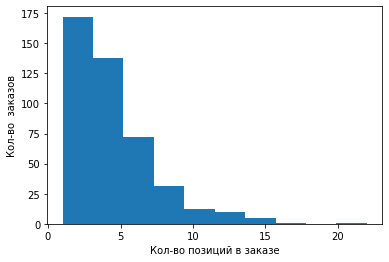

In [26]:
df_a_mult['order_items_cnt'].plot(kind = 'hist')
plt.ylabel('Кол-во  заказов')
plt.xlabel('Кол-во позиций в заказе')

### Если в заказе более 22 позиций, то заказы не объединяются



In [27]:
df_a[df_a.order_items_cnt > 22] # проверяем, что среди заказов с кол-вом позиций больше 22 нет объединенных

,order_created_datetime,brand_name,rest_id,batched_with_order_id,order_id,first_in_multiorder_flg,courier_id,order_items_cnt,city,hour_order,minute_order
1651,2015-09-13 19:22:58.000000,A,dcc8e7673c2d6f5b9a10073a5479749a,NaN,8b7b22268bc3f6eaa9209dfa7a75aee9,NaN,a6b94055af1076ca40ed023f870e5583,26,e6705560085199e9674cd721ee844d0d,19,22
3694,2015-09-14 12:21:11.000000,A,f3cdbc032b861a7790d8283f15736ab8,NaN,f19484f0a0e51be7de743ff61b186aaa,NaN,f2011674c6e2b24f38f5de01df2af33b,30,ea9f1e9302826b93f5ac1898375fbc38,12,21
8526,2015-09-13 14:54:28.000000,A,063b80595992bc2530bd3d15b2d2b2a6,NaN,fc76e0a572f4963f9c0983aacb9b1488,NaN,1c91731fea6adca4e2421c7d727b7b1e,24,c347f80a551e12a7cda160177741c051,14,54
9934,2015-09-16 09:22:03.000000,A,cf6d4fc513775e1c5ef0e37fa41bd238,NaN,0474ad665fda76ea8bb1e5fa08ba52c5,NaN,5b17547f825d9cf35c7853621dd842f8,23,e6705560085199e9674cd721ee844d0d,9,22
18669,2015-09-13 13:41:41.000000,A,f51c9abed17aa26da6f9c1ebfe94c7d7,NaN,18191875f68ed5e293c04fbbfa4d3a98,NaN,0a59239d252c0b6b98696e859b8c1c8e,28,9a8fe36e44485af8b9e4b6352043555d,13,41
22305,2015-09-13 13:15:21.000000,A,2fdb25c1e58148f94fc3f8d34732b6f1,NaN,1bc54c971d691f727360e63ec422c548,NaN,82bcb845c3542c23c775d135466801b3,32,e6705560085199e9674cd721ee844d0d,13,15
27816,2015-09-15 20:15:28.000000,A,bf10b6f05d697c5e601e5ceb04391cdb,NaN,0bbdb552f19407782ee2da64a5384d49,NaN,be2b087bf961b42ce94f1f4a1ee8a7ac,25,102f53437938e3d8dfa371c17f44e269,20,15
37841,2015-09-15 15:32:08.000000,A,8e67230d1691c9d212083790a349cf03,NaN,4f1723e9906c9b2b30ba283b5b805a90,NaN,ce8867ce9423ec8929d3bd38667cbbab,26,9a8fe36e44485af8b9e4b6352043555d,15,32
40501,2015-09-13 14:39:38.000000,A,06958543dc7cdda38b4bf841088ef20e,NaN,ff583314f4c924acd2ae06809314eac3,NaN,d76314e3e7f76999b4cd150414f58def,35,1dcf79e0f4f3748ef858d6c1001929ea,14,39
52635,2015-09-15 13:48:54.000000,A,c0989bc2112424fefbd022122ed943bf,NaN,d5d75cffd116a68d0fc1f9e1157db2da,NaN,5b17547f825d9cf35c7853621dd842f8,33,e6705560085199e9674cd721ee844d0d,13,48


## Найдем диапазон времени возможности образования объединенного заказа 

In [28]:
"""Находим разницу во времени между двумя заказами, объединенными в один мультизаказ.
   Делим датасет с объединенными заказами на 2 датасета по значению first_in_multiorder_flg, 
   а потом объединяем два датасета, чтобы получить датасет с доп столбцом со временем парного заказа, 
   чтобы можно было посчитать разницу"""
    
    

mask = df_a_mult['first_in_multiorder_flg'] == 1
df_x, df_y = df_a_mult[mask], df_a_mult[~mask]
df_delta=df_x.merge(df_y, left_on='batched_with_order_id', right_on='order_id', how ='inner')
display(df_delta)

,order_created_datetime_x,brand_name_x,rest_id_x,batched_with_order_id_x,order_id_x,first_in_multiorder_flg_x,courier_id_x,order_items_cnt_x,city_x,hour_order_x,...,brand_name_y,rest_id_y,batched_with_order_id_y,order_id_y,first_in_multiorder_flg_y,courier_id_y,order_items_cnt_y,city_y,hour_order_y,minute_order_y
0,2015-09-13 13:31:28.000000,A,4f67f63ef20bd9541e8e98c62a41adc8,2506b51ec60ce15683b6540373d7c9c2,9bea4d0806522ef428a993464dfe2cd5,1.0,d20b6cce1fbd76c75192555d083fae2c,1,e6705560085199e9674cd721ee844d0d,13,...,A,4f67f63ef20bd9541e8e98c62a41adc8,9bea4d0806522ef428a993464dfe2cd5,2506b51ec60ce15683b6540373d7c9c2,0.0,d20b6cce1fbd76c75192555d083fae2c,4,e6705560085199e9674cd721ee844d0d,13,19
1,2015-09-14 21:12:12.000000,A,9b73035bb90cd7de4b9c1ff01e44f178,10f036a70924178cfb5ee762da4c56c2,f33fc1f670f4150526faa1291816158f,1.0,5727e75f0b8020acad71f318cfb9e90b,5,e6705560085199e9674cd721ee844d0d,21,...,A,9b73035bb90cd7de4b9c1ff01e44f178,f33fc1f670f4150526faa1291816158f,10f036a70924178cfb5ee762da4c56c2,0.0,5727e75f0b8020acad71f318cfb9e90b,3,e6705560085199e9674cd721ee844d0d,21,8
2,2015-09-14 23:11:07.000000,A,b3bf2fc20c4646298c05716fbe1aa135,a91a73cc77884c0c594d0a600aa0fe5b,0e0984a5a2019591d54af8bde172e75b,1.0,d41ff061323280cf0cebd9adb7a0755e,5,e6705560085199e9674cd721ee844d0d,23,...,A,b3bf2fc20c4646298c05716fbe1aa135,0e0984a5a2019591d54af8bde172e75b,a91a73cc77884c0c594d0a600aa0fe5b,0.0,d41ff061323280cf0cebd9adb7a0755e,5,e6705560085199e9674cd721ee844d0d,23,25
3,2015-09-13 22:13:15.000000,A,bc88b0650a748b43b1d6a2d5e7460331,a445ec281209e49a121c9ef3c8ca5aeb,3372ba11de75d1bb8d463268051d8090,1.0,285c3c5407bc05609cd4616296aaea83,6,e6705560085199e9674cd721ee844d0d,22,...,A,bc88b0650a748b43b1d6a2d5e7460331,3372ba11de75d1bb8d463268051d8090,a445ec281209e49a121c9ef3c8ca5aeb,0.0,285c3c5407bc05609cd4616296aaea83,5,e6705560085199e9674cd721ee844d0d,22,10
4,2015-09-13 18:20:47.000000,A,3b83cec768ee9456b59a8051ead1c6fb,0ea5b6c8a1034d60c089c8fa2335194f,5b6d9050e4ce7c496c387bd2a64b7921,1.0,5507a0f34faeb458294cc35f6fde1071,2,e6705560085199e9674cd721ee844d0d,18,...,A,3b83cec768ee9456b59a8051ead1c6fb,5b6d9050e4ce7c496c387bd2a64b7921,0ea5b6c8a1034d60c089c8fa2335194f,0.0,5507a0f34faeb458294cc35f6fde1071,2,e6705560085199e9674cd721ee844d0d,18,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,2015-09-15 20:52:00.000000,A,304c5a352ef5a8a99017e4c2b222dd2b,b6f424bafa97c132953d3a867f961b41,970a6e3825fad425d4ead2537ba3e5ba,1.0,05cc25f8e2c52cced489ee3dd040ec18,4,e6705560085199e9674cd721ee844d0d,20,...,A,304c5a352ef5a8a99017e4c2b222dd2b,970a6e3825fad425d4ead2537ba3e5ba,b6f424bafa97c132953d3a867f961b41,0.0,05cc25f8e2c52cced489ee3dd040ec18,6,e6705560085199e9674cd721ee844d0d,20,59
217,2015-09-15 18:59:48.000000,A,67dad1e37306316763668dce80f111ed,b39db8b30bd9c0fa8aae775403130d40,1e57af3ca8dbfca2a402580dbfd3cc94,1.0,31aae7ec1afba15c0595972127c15c73,4,e6705560085199e9674cd721ee844d0d,18,...,A,67dad1e37306316763668dce80f111ed,1e57af3ca8dbfca2a402580dbfd3cc94,b39db8b30bd9c0fa8aae775403130d40,0.0,31aae7ec1afba15c0595972127c15c73,2,e6705560085199e9674cd721ee844d0d,19,1
218,2015-09-15 21:10:26.000000,A,209e34a1614d9469fddabc7158003653,75f2144012c89ff38d64528249a3b66a,1615d55a81b7c68f292c381146cfd30f,1.0,f3f94fe6582fc6ac052af9a8ff384a2e,2,e6705560085199e9674cd721ee844d0d,21,...,A,209e34a1614d9469fddabc7158003653,1615d55a81b7c68f292c381146cfd30f,75f2144012c89ff38d64528249a3b66a,0.0,f3f94fe6582fc6ac052af9a8ff384a2e,4,e6705560085199e9674cd721ee844d0d,21,17
219,2015-09-14 14:40:35.000000,A,974d115d8040e56fcac9638bd33e1731,bdb29739e550cd9bce8d0b2e07b6f33b,759928f3b5075cf0eea68cc97d17cf06,1.0,88750b500f3f628d7d85b352f6113736,2,e6705560085199e9674cd721ee844d0d,14,...,A,974d115d8040e56fcac9638bd33e1731,759928f3b5075cf0eea68cc97d17cf06,bdb29739e550cd9bce8d0b2e07b6f33b,0.0,88750b500f3f628d7d85b352f6113736,7,e6705560085199e9674cd721ee844d0d,14,35



## Диапазон времени, в течение которого заказы могут объедениться

In [29]:
delta = abs(pd.to_datetime(df_delta.order_created_datetime_x)-pd.to_datetime(df_delta.order_created_datetime_y)).sort_values()  # находим дельту времени


#### Средняя дельта во времени между двумя объединенными заказами - 9 мин
#### Медианная дельта во времени между двумя объединенными заказами - 6 мин

In [30]:
display(delta.describe())

count                       221
mean     0 days 00:09:15.714932
std      0 days 00:34:53.343377
min             0 days 00:00:02
25%             0 days 00:02:56
50%             0 days 00:06:04
75%             0 days 00:09:39
max             0 days 08:39:48
dtype: object

### Таким образом, диапазон времени, в течение которого заказы могут объедениться получается от 2 секунд  до 8 часов 39 минут. 

In [31]:
"""При просмотре дельты времени между заказами, объединенными в 1 мультизаказ, обнаружился уникальный случай,
в котором разница между заказами составила 8 часов - это мог быть случай, 
когда человек сделал заказ к определенному времени (оформлен ночью,
а желаемая дата доставки оказалась после открытия ресторана и совпала с размещенным вторым заказом),
либо это ошибка один заказ оформили ночью в 4 утра к определенному времени (видимо ресторан открылся в 12),
и второй заказ упал в 12:39 и поэтому их объединили.
Предположим, что максимальное время между заказами 40 мин в рамках режима работы ресторана""

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-31-fcc43f34e77a>, line 7)

In [ ]:
df_delta.loc[168]

## Максимальное число позиций в одном мультизаказе 27

In [ ]:
df_delta['order_items_sum']=df_delta['order_items_cnt_y']+df_delta['order_items_cnt_x']
df_delta['order_items_sum'].max()

In [ ]:
"""Cтроим гистограмму, отражающую количество позиций в мультизаказе
    в основном мультизаказ насчитывает от 5 до 13 позиций"""


df_delta['order_items_sum'].plot(kind = 'hist', grid = True, title = 'Количество позиций в мультизаказе')
plt.ylabel('Кол-во объединенных заказов')
plt.xlabel('Кол-во позиций в заказе')

## Объединенные заказы размещались примерно с 8 утра до 23:00 ночи

In [ ]:
df_delta['hour_order_x'].plot(kind = 'hist', grid = True, title = 'Час оформления объединенного заказа')
plt.ylabel('Кол-во объединенных заказов')
plt.xlabel('Час ')   

In [ ]:
df_a['hour_order'].plot(kind = 'hist', grid = True, title = 'Час оформления всех заказов')
plt.ylabel('Кол-во  заказов')
plt.xlabel('Час ') 

In [ ]:
#из материалов и расчетов выше делаем вывод, что заказы объединяются по принципу: один город, один ресторан,
#время между заказами до 40 минут, количество позиций в мультизаказе до 27, время в которое возможно объединение заказов от 8:00 до 00:00

## Исследуем массив заказов из группы А, которые не были  объединены

In [ ]:
df_a = df_a.fillna('-')
df_a_na = df_a[df_a['batched_with_order_id']=='-' ] 
df_a_na.order_created_datetime=pd.to_datetime(df_a_na.order_created_datetime)
df_a_na[df_a_na.rest_id=='9b73035bb90cd7de4b9c1ff01e44f178'].sort_values(by ='order_created_datetime')
df_a_na[(df_a_na.rest_id=='9b73035bb90cd7de4b9c1ff01e44f178') & (df_a_na.courier_id =='5b17547f825d9cf35c7853621dd842f8')].sort_values(by ='order_created_datetime')

#исследовав заказы по одному из ресторанов и одному и тому же курьеру, пришли к выводу, 
#что ночные заказы не объединяются, т.е. алгоритм не объединяет ночные заказы

In [ ]:
df_a_na['hour_order'].plot(kind = 'hist', grid = True, title = 'Час оформления несовмещенных заказов')
plt.ylabel('Кол-во  заказов')
plt.xlabel('Час ') 

### Проанализировав необъединенные заказы пришли к выводу, что ночные заказы не объединяются друг с другом


# Делаем дела с выборкой B

In [ ]:
df_b #датафрейм выборки B

### Очищаем выборку исходя из времени заказа (от 8:00 до 00:00)

In [33]:
df_b_cleared = df_b[((df_b['hour_order'] >=8) & (df_b['minute_order'] >=0)) & ((df_b['hour_order'] <= 23) & (df_b['minute_order'] <=59))]

In [34]:
df_b_cleared.head()

,order_created_datetime,brand_name,rest_id,batched_with_order_id,order_id,first_in_multiorder_flg,courier_id,order_items_cnt,city,hour_order,minute_order
0,2015-09-15 21:08:43.000000,B,7cc98331ddb8ccffe464455f3df763d9,NaN,0b6f25c79b35fd1e6d28d845b7ee511d,NaN,3f1b96f620988a92d3409ea05e87bd36,3,c6fbacc5cab7e134c9db2a4bbfcc5b64,21,8
3,2015-09-13 17:23:52.000000,B,7cc98331ddb8ccffe464455f3df763d9,NaN,5dc658f0928569dbefac74c9f311031c,NaN,81647a72700bd46635d9606082360cc8,6,c6fbacc5cab7e134c9db2a4bbfcc5b64,17,23
4,2015-09-13 11:15:05.000000,B,7cc98331ddb8ccffe464455f3df763d9,NaN,3da09410aeab781baf4b7039fc9b125c,NaN,065c18216b6d3369d4cc36418c6e80f2,7,c6fbacc5cab7e134c9db2a4bbfcc5b64,11,15
5,2015-09-14 11:28:04.000000,B,4f862b1c0f475f2ec02d0bb492e1bb6b,NaN,0d87ec6db915db7b08d030c180b5544d,NaN,901d78a522546d63a5880dca87a9fc68,2,29b5d0e91de8f84cbb829977dfb8f4a3,11,28
6,2015-09-15 18:05:27.000000,B,7cc98331ddb8ccffe464455f3df763d9,NaN,2962a825d28d38d8521732054cd33a21,NaN,4254e1350fb4b678534934e12186ca5b,8,c6fbacc5cab7e134c9db2a4bbfcc5b64,18,5


In [35]:
df_b_cleared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55720 entries, 0 to 66461
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_created_datetime   55720 non-null  object 
 1   brand_name               55720 non-null  object 
 2   rest_id                  55720 non-null  object 
 3   batched_with_order_id    0 non-null      object 
 4   order_id                 55720 non-null  object 
 5   first_in_multiorder_flg  0 non-null      float64
 6   courier_id               55656 non-null  object 
 7   order_items_cnt          55720 non-null  int64  
 8   city                     55720 non-null  object 
 9   hour_order               55720 non-null  int32  
 10  minute_order             55720 non-null  int32  
dtypes: float64(1), int32(2), int64(1), object(7)
memory usage: 4.7+ MB


In [36]:
df_b_cleared.describe() # 

,first_in_multiorder_flg,order_items_cnt,hour_order,minute_order
count,0.0,55720.000000,55720.000000,55720.000000
mean,NaN,4.625736,15.177405,29.240524
std,NaN,3.246401,4.208158,17.250705
min,NaN,1.000000,8.000000,0.000000
25%,NaN,3.000000,12.000000,14.000000
50%,NaN,4.000000,15.000000,29.000000
75%,NaN,6.000000,19.000000,44.000000
max,NaN,108.000000,23.000000,59.000000


In [37]:
df_b_cleared.rest_id.value_counts()

7cc98331ddb8ccffe464455f3df763d9    605
c990b25894426c0ac4767680c5951ab2    587
cdfe9bf9a7d4f3a8d6fed9d032e26e7e    497
0d12507f6de6125f6288915c7dd06783    481
d9e5f2bf350b61f1c2cc15f044bda13d    476
                                   ... 
89fa548b6914e8b3c32163e58996aed1      3
5bdd5bf804b88a10bdf32c47bb3890f7      2
1382effafc5d060ddb27a2d2b105f666      2
ad86b874466d7c23d8198f07d4466dfb      2
58362b85407562242fe2cb66cde31c9a      1
Name: rest_id, Length: 580, dtype: int64

In [38]:
df_b_cleared[df_b_cleared.rest_id=='7cc98331ddb8ccffe464455f3df763d9'].sort_values(by ='order_created_datetime') #

,order_created_datetime,brand_name,rest_id,batched_with_order_id,order_id,first_in_multiorder_flg,courier_id,order_items_cnt,city,hour_order,minute_order
45105,2015-09-13 08:05:11.000000,B,7cc98331ddb8ccffe464455f3df763d9,NaN,3d9fb6c6907a624464c2db0fd6a73ce5,NaN,3cdb43e35efafbf9ad0b21895f3f8637,5,c6fbacc5cab7e134c9db2a4bbfcc5b64,8,5
45052,2015-09-13 08:09:37.000000,B,7cc98331ddb8ccffe464455f3df763d9,NaN,adb0bd6929eb031f5877a0566303e51e,NaN,8160037a937279eae6829f62cfb55b15,3,c6fbacc5cab7e134c9db2a4bbfcc5b64,8,9
43920,2015-09-13 08:15:51.000000,B,7cc98331ddb8ccffe464455f3df763d9,NaN,abc07049791c4cdc156499c1e4d728fd,NaN,312e3c3295030248c958a336294adc96,1,c6fbacc5cab7e134c9db2a4bbfcc5b64,8,15
44942,2015-09-13 08:17:44.000000,B,7cc98331ddb8ccffe464455f3df763d9,NaN,18d65ffaea5e75ee980827442f055598,NaN,396f04585ea4cb66882f41b64b89562c,2,c6fbacc5cab7e134c9db2a4bbfcc5b64,8,17
44171,2015-09-13 08:23:42.000000,B,7cc98331ddb8ccffe464455f3df763d9,NaN,59f21bf7f11b86334b71898ec25a1cde,NaN,affa86c4c91fe88037755a2b2b190771,3,c6fbacc5cab7e134c9db2a4bbfcc5b64,8,23
...,...,...,...,...,...,...,...,...,...,...,...
44226,2015-09-16 10:43:19.000000,B,7cc98331ddb8ccffe464455f3df763d9,NaN,37a9344647bd8964a57ea267a5643bf8,NaN,95f38ac0a69c0fd2b8962652c316227f,5,c6fbacc5cab7e134c9db2a4bbfcc5b64,10,43
886,2015-09-16 10:44:51.000000,B,7cc98331ddb8ccffe464455f3df763d9,NaN,ab5ecda175cb6026f26c50e5bf001a68,NaN,83fce3473ee0fa75c8b3185de315a1b3,3,c6fbacc5cab7e134c9db2a4bbfcc5b64,10,44
2854,2015-09-16 10:48:46.000000,B,7cc98331ddb8ccffe464455f3df763d9,NaN,42c781383b81896ac050e028b46eb597,NaN,8d0645ca53ca8c8bfa2cf7756964fe4d,3,c6fbacc5cab7e134c9db2a4bbfcc5b64,10,48
45136,2015-09-16 10:55:00.000000,B,7cc98331ddb8ccffe464455f3df763d9,NaN,510a9840c9dd458cf9c95960ee874650,NaN,7236603b440b5d88d064eb5d0dd82b16,3,c6fbacc5cab7e134c9db2a4bbfcc5b64,10,55
